Dataset used: Mobile Price Prediction dataset

Features of dataset:

1. Screen Size (inches)
2. RAM (GB)
3. Storage (GB)
4. Battery Capacity (mAh)
5. Camera Quality (MP)
6. Price ($)

Target class: Price($)


For Regression, we'll be implementing the following models on our dataset:

1. Linear Regression
2. Decision Trees
3. Random Forests
4. k-Nearest Neighbors (kNN)

The Evaluation Matrix are as follows
1. Mean Square Error(MSE)
2. R-squared

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mobile Price Prediction.csv to Mobile Price Prediction.csv


Linear Regression

Mean Squared Error: 15644.969556700702
R-squared: 0.1073571705150771


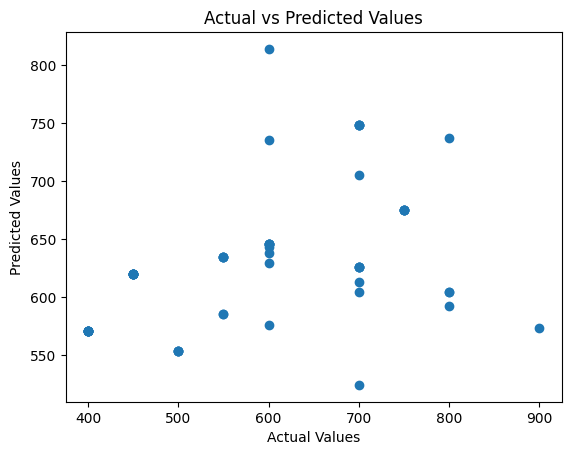

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('./Mobile Price Prediction.csv', header=0)  # Assuming the header is in the first row

# Assuming the last column is the dependent variable and all others are independent variables
X = data.iloc[:, :-1]  # Independent variables
y = data.iloc[:, -1]   # Dependent variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize results (assuming 2D visualization for simplicity)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

Test and Training Data Graphs for checking underfit or overfit

Training Set - Linear Regression:
Mean Squared Error: 14081.70682056881
R-squared: 0.18087434604264474

Testing Set - Linear Regression:
Mean Squared Error: 15644.969556700702
R-squared: 0.1073571705150771



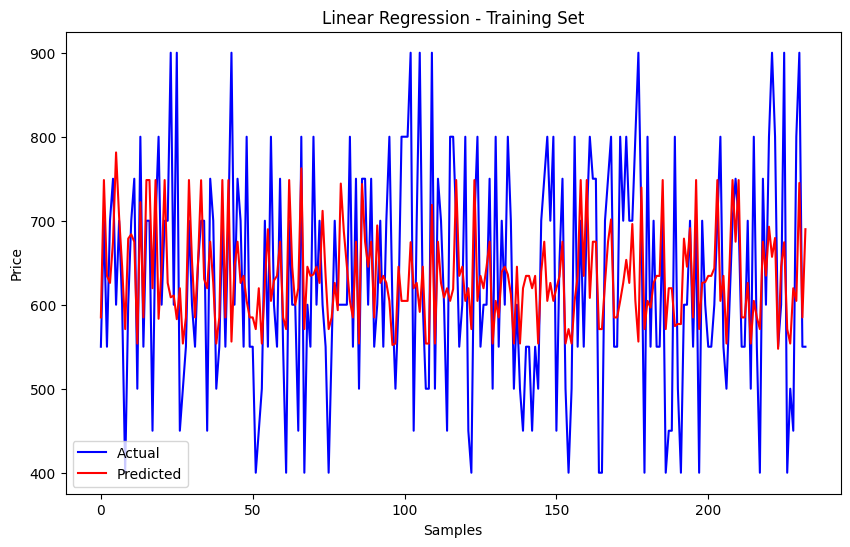

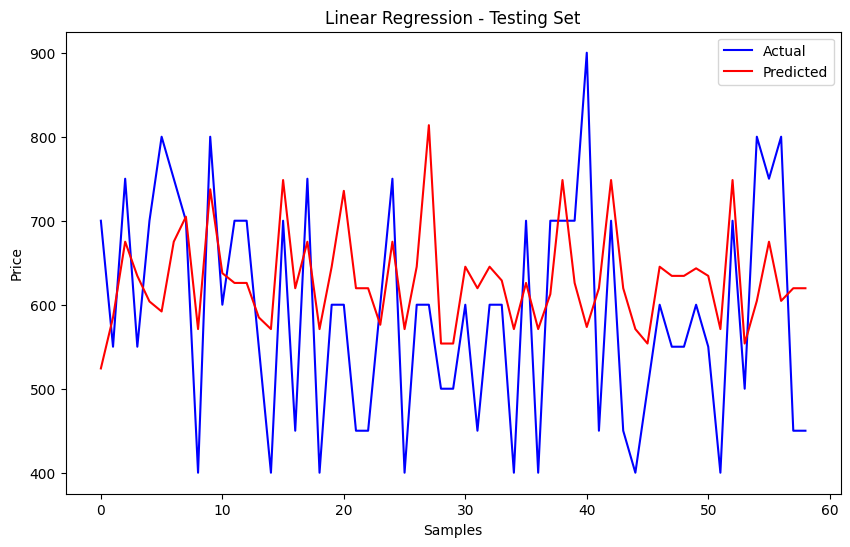

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Replace 'data.csv' with the path to your dataset
data = pd.read_csv('./Mobile Price Prediction.csv', header=0)  # Assuming the header is in the first row

# Assuming the last column is the dependent variable and all others are independent variables
X = data.iloc[:, :-1]  # Independent variables
y = data.iloc[:, -1]   # Dependent variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_lr = model_lr.predict(X_train)

# Make predictions on the test set
y_test_pred_lr = model_lr.predict(X_test)

# Calculate evaluation metrics for training set
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

# Calculate evaluation metrics for testing set
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# Print evaluation metrics for training set
print("Training Set - Linear Regression:")
print("Mean Squared Error:", mse_train_lr)
print("R-squared:", r2_train_lr)
print()

# Print evaluation metrics for testing set
print("Testing Set - Linear Regression:")
print("Mean Squared Error:", mse_test_lr)
print("R-squared:", r2_test_lr)
print()

# Plotting
plt.figure(figsize=(10, 6))

# Plotting for Linear Regression - Training Set
plt.plot(np.arange(len(y_train)), y_train, label='Actual', color='blue')
plt.plot(np.arange(len(y_train)), y_train_pred_lr, label='Predicted', color='red')
plt.title('Linear Regression - Training Set')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting for Linear Regression - Testing Set
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual', color='blue')
plt.plot(np.arange(len(y_test)), y_test_pred_lr, label='Predicted', color='red')
plt.title('Linear Regression - Testing Set')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()

Hyperparemeter Tuning by regularization and feature engineering

Best alpha for Lasso regression: 0.1
Best alpha for Ridge regression: 0.01
Training Set - Linear Regression:
Mean Squared Error: 10264.25566333865
R-squared: 0.4029335193701936

Training Set - Lasso Regression:
Mean Squared Error: 10901.143794464975
R-squared: 0.3658860638625625

Training Set - Ridge Regression:
Mean Squared Error: 10419.159778936912
R-squared: 0.3939228265183319

Testing Set - Linear Regression:
Mean Squared Error: 12461.963267659421
R-squared: 0.28896747853265947

Testing Set - Lasso Regression:
Mean Squared Error: 13134.859483067838
R-squared: 0.2505745638328283

Testing Set - Ridge Regression:
Mean Squared Error: 12840.75163659023
R-squared: 0.26735524591098847



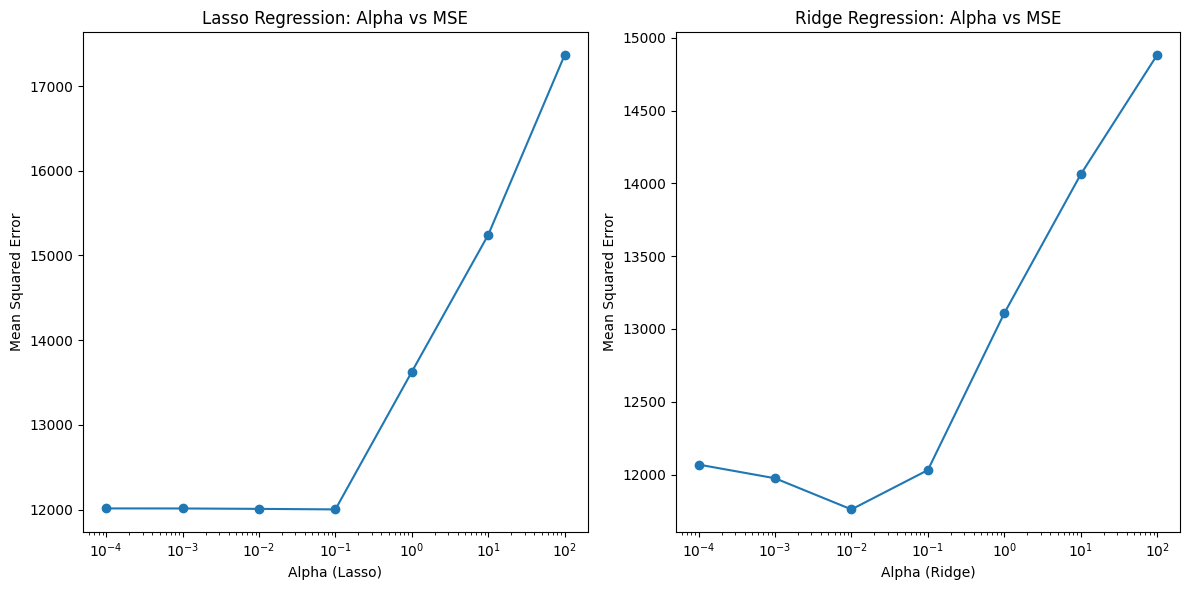

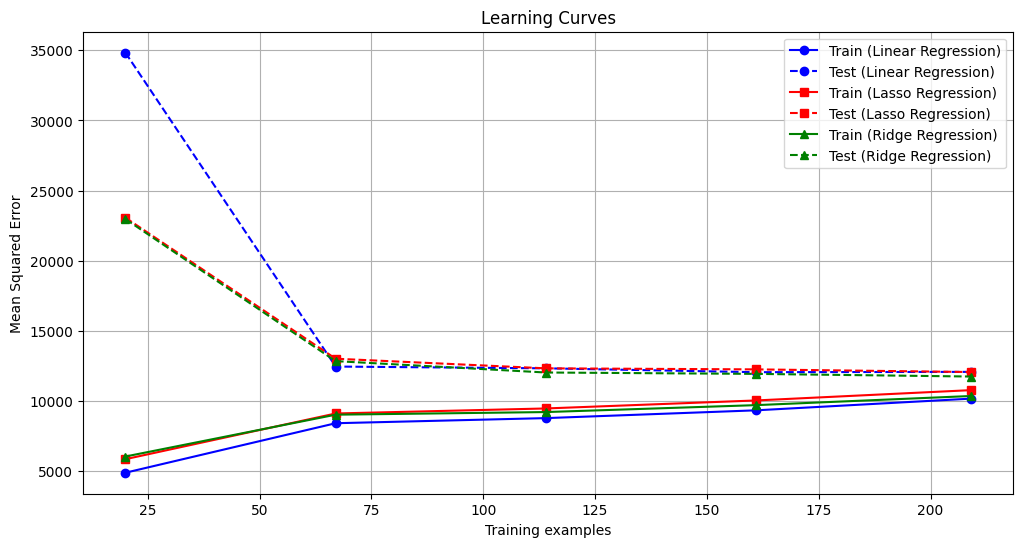

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.exceptions import ConvergenceWarning

# Load the dataset
data = pd.read_csv('./Mobile Price Prediction.csv')

# Feature Engineering
data['Screen_Size_Ram'] = data['Screen Size (inches)'] * data['RAM (GB)']
data['Camera_Quality_Battery'] = data['Camera Quality (MP)'] * data['Battery Capacity (mAh)']
data['Screen_Size_Squared'] = data['Screen Size (inches)'] ** 2
data['RAM_Cubed'] = data['RAM (GB)'] ** 3

# Feature Scaling (RobustScaler)
scaler = RobustScaler()
scaled_features = scaler.fit_transform(data[['Screen Size (inches)', 'RAM (GB)', 'Storage (GB)', 'Battery Capacity (mAh)', 'Camera Quality (MP)', 'Screen_Size_Ram', 'Camera_Quality_Battery', 'Screen_Size_Squared', 'RAM_Cubed']])
scaled_df = pd.DataFrame(scaled_features, columns=['Screen Size (inches)', 'RAM (GB)', 'Storage (GB)', 'Battery Capacity (mAh)', 'Camera Quality (MP)', 'Screen_Size_Ram', 'Camera_Quality_Battery', 'Screen_Size_Squared', 'RAM_Cubed'])
data = pd.concat([data.drop(columns=['Screen Size (inches)', 'RAM (GB)', 'Storage (GB)', 'Battery Capacity (mAh)', 'Camera Quality (MP)', 'Screen_Size_Ram', 'Camera_Quality_Battery', 'Screen_Size_Squared', 'RAM_Cubed']), scaled_df], axis=1)

# Split the dataset into features and target variable
X = data.drop(columns=['Price ($)'])
y = data['Price ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a wider range of alpha values for Lasso and Ridge regression
param_grid_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
param_grid_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Perform grid search with cross-validation for Lasso regression
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=10, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_alpha_lasso = grid_search_lasso.best_params_['alpha']

# Perform grid search with cross-validation for Ridge regression
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=10, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_alpha_ridge = grid_search_ridge.best_params_['alpha']

print("Best alpha for Lasso regression:", best_alpha_lasso)
print("Best alpha for Ridge regression:", best_alpha_ridge)

# Train the models with the best hyperparameters
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

model_lasso = Lasso(alpha=best_alpha_lasso, max_iter=10000)
model_lasso.fit(X_train, y_train)

model_ridge = Ridge(alpha=best_alpha_ridge)
model_ridge.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_lr = model_lr.predict(X_train)
y_train_pred_lasso = model_lasso.predict(X_train)
y_train_pred_ridge = model_ridge.predict(X_train)

# Make predictions on the test set
y_test_pred_lr = model_lr.predict(X_test)
y_test_pred_lasso = model_lasso.predict(X_test)
y_test_pred_ridge = model_ridge.predict(X_test)

# Calculate evaluation metrics for training set
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

# Calculate evaluation metrics for testing set
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Print evaluation metrics for training set
print("Training Set - Linear Regression:")
print("Mean Squared Error:", mse_train_lr)
print("R-squared:", r2_train_lr)
print()

print("Training Set - Lasso Regression:")
print("Mean Squared Error:", mse_train_lasso)
print("R-squared:", r2_train_lasso)
print()

print("Training Set - Ridge Regression:")
print("Mean Squared Error:", mse_train_ridge)
print("R-squared:", r2_train_ridge)
print()

# Print evaluation metrics for testing set
print("Testing Set - Linear Regression:")
print("Mean Squared Error:", mse_test_lr)
print("R-squared:", r2_test_lr)
print()

print("Testing Set - Lasso Regression:")
print("Mean Squared Error:", mse_test_lasso)
print("R-squared:", r2_test_lasso)
print()

print("Testing Set - Ridge Regression:")
print("Mean Squared Error:", mse_test_ridge)
print("R-squared:", r2_test_ridge)
print()

# Extract alpha values and corresponding mean squared errors from Lasso and Ridge grid search results
lasso_alphas = [params['alpha'] for params in grid_search_lasso.cv_results_['params']]
lasso_mse_scores = -grid_search_lasso.cv_results_['mean_test_score']

ridge_alphas = [params['alpha'] for params in grid_search_ridge.cv_results_['params']]
ridge_mse_scores = -grid_search_ridge.cv_results_['mean_test_score']

# Plotting graphs
plt.figure(figsize=(12, 6))

# Plotting learning rate vs accuracy for Lasso Regression
plt.subplot(1, 2, 1)
plt.plot(lasso_alphas, lasso_mse_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: Alpha vs MSE')

# Plotting learning rate vs accuracy for Ridge Regression
plt.subplot(1, 2, 2)
plt.plot(ridge_alphas, ridge_mse_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Alpha vs MSE')

plt.tight_layout()
plt.show()

# Plotting learning curves
plt.figure(figsize=(12, 6))

# Plotting learning curve for Linear Regression
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(model_lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
train_scores_mean_lr = -np.mean(train_scores_lr, axis=1)
test_scores_mean_lr = -np.mean(test_scores_lr, axis=1)
plt.plot(train_sizes_lr, train_scores_mean_lr, label='Train (Linear Regression)', color='blue', marker='o')
plt.plot(train_sizes_lr, test_scores_mean_lr, label='Test (Linear Regression)', color='blue', linestyle='--', marker='o')

# Plotting learning curve for Lasso Regression
train_sizes_lasso, train_scores_lasso, test_scores_lasso = learning_curve(model_lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
train_scores_mean_lasso = -np.mean(train_scores_lasso, axis=1)
test_scores_mean_lasso = -np.mean(test_scores_lasso, axis=1)
plt.plot(train_sizes_lasso, train_scores_mean_lasso, label='Train (Lasso Regression)', color='red', marker='s')
plt.plot(train_sizes_lasso, test_scores_mean_lasso, label='Test (Lasso Regression)', color='red', linestyle='--', marker='s')

# Plotting learning curve for Ridge Regression
train_sizes_ridge, train_scores_ridge, test_scores_ridge = learning_curve(model_ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
train_scores_mean_ridge = -np.mean(train_scores_ridge, axis=1)
test_scores_mean_ridge = -np.mean(test_scores_ridge, axis=1)
plt.plot(train_sizes_ridge, train_scores_mean_ridge, label='Train (Ridge Regression)', color='green', marker='^')
plt.plot(train_sizes_ridge, test_scores_mean_ridge, label='Test (Ridge Regression)', color='green', linestyle='--', marker='^')

# Plotting details
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.grid()
plt.show()

We can see the gap between training and testing errors is less, so it is a better fit than before hyperparameter tuning. As the R2 score is still very low, we can say that this is not a suitable model.

# K Nearest Neighbours

Mean Squared Error: 1435.593220338983
R-squared: 0.9180904769709883


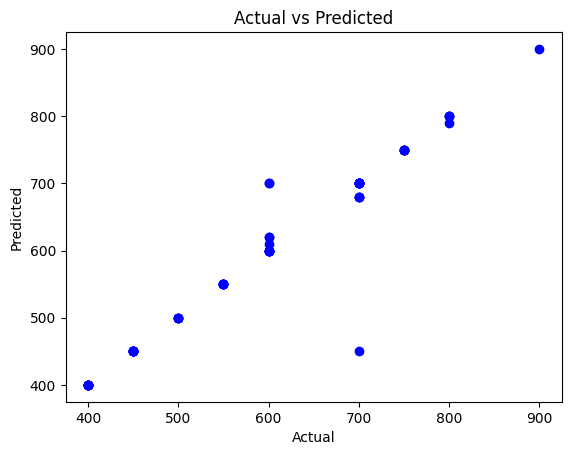

In [ ]:
# knn_regression.py

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from CSV file
data = pd.read_csv('Mobile Price Prediction.csv')

# Extract feature columns (all columns except the last one) and dependent variable column
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Extract header row for parameter names
headers = list(data.columns[:-1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the results
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

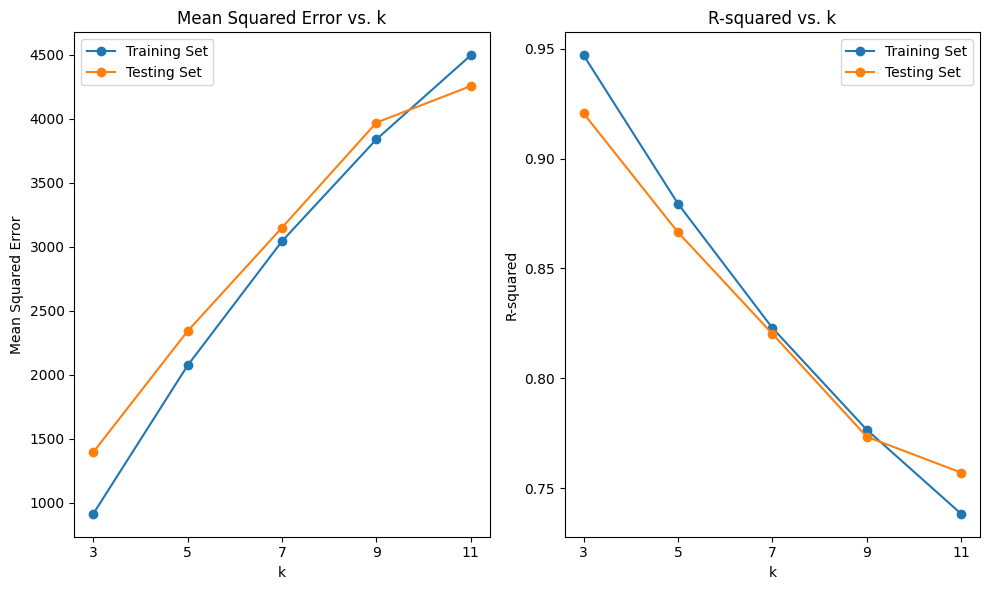

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

# Load the dataset from CSV file
data = pd.read_csv('Mobile Price Prediction.csv')

# Extract feature columns (all columns except the last one) and dependent variable column
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Dimensionality Reduction (PCA)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'n_neighbors': [3,5,7,9,11]}  # Try different values of k
knn_regressor = KNeighborsRegressor()
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

# Extract MSE and R2 values for training and testing sets for each value of k
train_mses = []
test_mses = []
train_r2s = []
test_r2s = []
for k in param_grid['n_neighbors']:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_pca, y_train)
    y_train_pred = knn_regressor.predict(X_train_pca)
    y_test_pred = knn_regressor.predict(X_test_pca)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

# Plotting
plt.figure(figsize=(10, 6))

# MSE Plot
plt.subplot(1, 2, 1)
plt.plot(param_grid['n_neighbors'], train_mses, marker='o', label='Training Set')
plt.plot(param_grid['n_neighbors'], test_mses, marker='o', label='Testing Set')
plt.title('Mean Squared Error vs. k')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.xticks(param_grid['n_neighbors'])
plt.legend()

# R2 Plot
plt.subplot(1, 2, 2)
plt.plot(param_grid['n_neighbors'], train_r2s, marker='o', label='Training Set')
plt.plot(param_grid['n_neighbors'], test_r2s, marker='o', label='Testing Set')
plt.title('R-squared vs. k')
plt.xlabel('k')
plt.ylabel('R-squared')
plt.xticks(param_grid['n_neighbors'])
plt.legend()

plt.tight_layout()
plt.show()

Included feature engineering

Training Set:
Mean Squared Error: 945.3981878874583
R-squared: 0.9450066729288622

Testing Set:
Mean Squared Error: 1393.596986817326
R-squared: 0.920486623322224


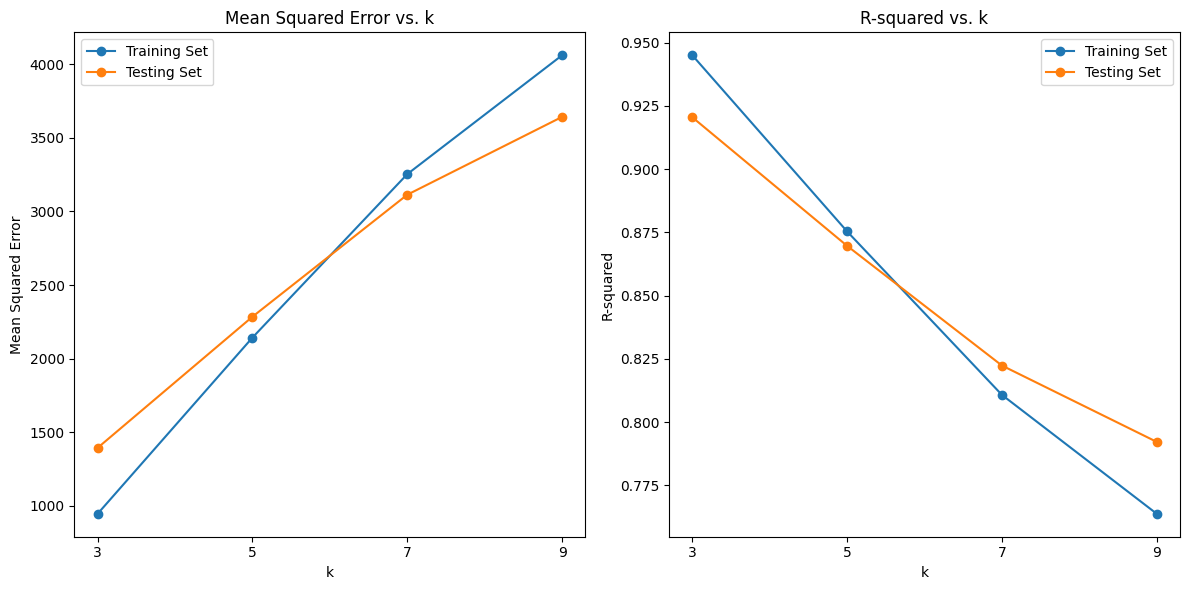

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

# Load the dataset from CSV file
data = pd.read_csv('Mobile Price Prediction.csv')

# Perform feature engineering
data['Screen_Size_Ram'] = data['Screen Size (inches)'] * data['RAM (GB)']
data['Camera_Quality_Battery'] = data['Camera Quality (MP)'] * data['Battery Capacity (mAh)']
data['Screen_Size_Squared'] = data['Screen Size (inches)'] ** 2
data['RAM_Cubed'] = data['RAM (GB)'] ** 3

# Extract feature columns (including new engineered features) and dependent variable column
X = data.drop(columns=['Price ($)']).values
y = data['Price ($)'].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Dimensionality Reduction (PCA)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9]}  # Try different values of k
knn_regressor = KNeighborsRegressor()
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

# Best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Initialize the KNN regression model with best hyperparameters
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)

# Train the model on the reduced dimensionality data
knn_regressor.fit(X_train_pca, y_train)

# Predict on both training and test sets
y_train_pred = knn_regressor.predict(X_train_pca)
y_test_pred = knn_regressor.predict(X_test_pca)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training Set:")
print("Mean Squared Error:", train_mse)
print("R-squared:", train_r2)
print("\nTesting Set:")
print("Mean Squared Error:", test_mse)
print("R-squared:", test_r2)

# Plotting MSE and R2 for different values of k
param_grid_values = param_grid['n_neighbors']
train_mses = []
test_mses = []
train_r2s = []
test_r2s = []

for k in param_grid_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_pca, y_train)
    y_train_pred = knn_regressor.predict(X_train_pca)
    y_test_pred = knn_regressor.predict(X_test_pca)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

# Plotting
plt.figure(figsize=(12, 6))

# MSE Plot
plt.subplot(1, 2, 1)
plt.plot(param_grid_values, train_mses, marker='o', label='Training Set')
plt.plot(param_grid_values, test_mses, marker='o', label='Testing Set')
plt.title('Mean Squared Error vs. k')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.xticks(param_grid_values)
plt.legend()

# R2 Plot
plt.subplot(1, 2, 2)
plt.plot(param_grid_values, train_r2s, marker='o', label='Training Set')
plt.plot(param_grid_values, test_r2s, marker='o', label='Testing Set')
plt.title('R-squared vs. k')
plt.xlabel('k')
plt.ylabel('R-squared')
plt.xticks(param_grid_values)
plt.legend()

plt.tight_layout()
plt.show()

Intersecting Line Graphs:
When the training and testing MSE graphs intersect, it suggests a specific point (usually a value of k in k-fold cross-validation or hyperparameter tuning) where the model’s performance on the testing set matches its performance on the training set.
This intersection point indicates a balance between overfitting (low training MSE but high testing MSE) and underfitting (high training and testing MSE).
Ideally, we want the model to generalize well to unseen data, which corresponds to a minimum testing MSE.

Practical Implications:
If the intersection occurs at a low value of k, it might indicate that the model is overfitting the training data.
Conversely, if the intersection occurs at a high value of k, the model may be underfitting.
Adjusting the model complexity (e.g., by tuning hyperparameters) can help find the optimal balance.

# Decision Tree

Mean Squared Error: 1483.050847457627
Mean Absolute Error: 7.627118644067797
R-squared: 0.915382724143583


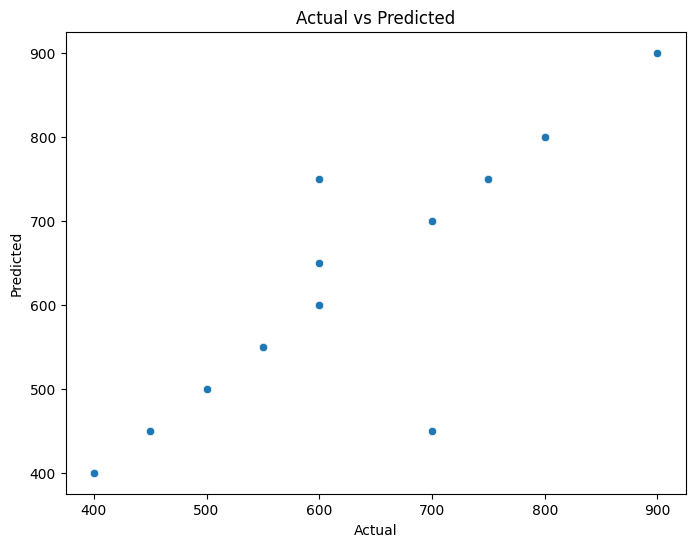

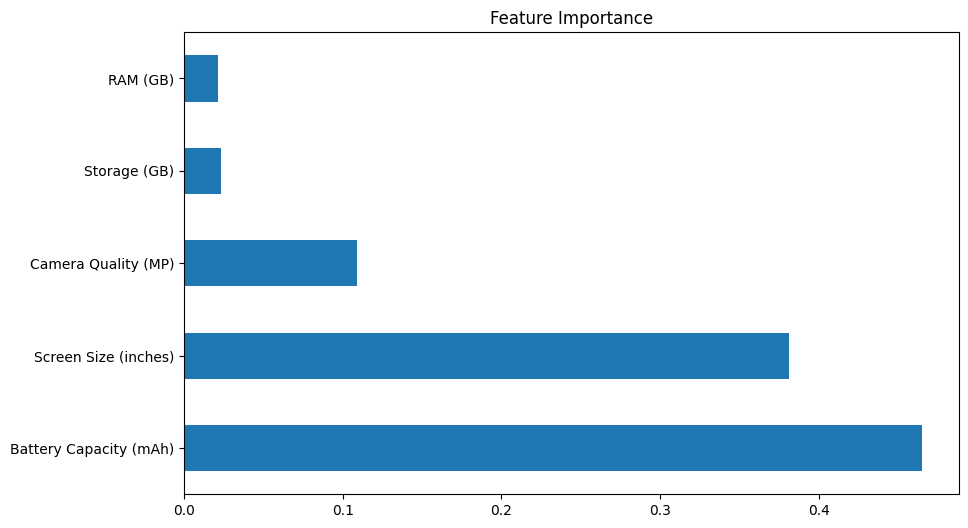

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
import graphviz
import os

# Load the dataset
df = pd.read_csv('Mobile Price Prediction.csv')

# Split the dataset into features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Train the model
dt_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_reg.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Feature Importance plot
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(dt_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

# Export the Decision Tree as a PNG file
export_graphviz(dt_reg, out_file='tree.dot', feature_names=X.columns, filled=True, rounded=True)

# Convert the DOT file to PNG
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render('decision_tree', format='png', cleanup=True)
os.remove('./tree.dot')

Training Set:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared: 1.0

Testing Set:
Mean Squared Error: 1483.050847457627
Mean Absolute Error: 7.627118644067797
R-squared: 0.915382724143583


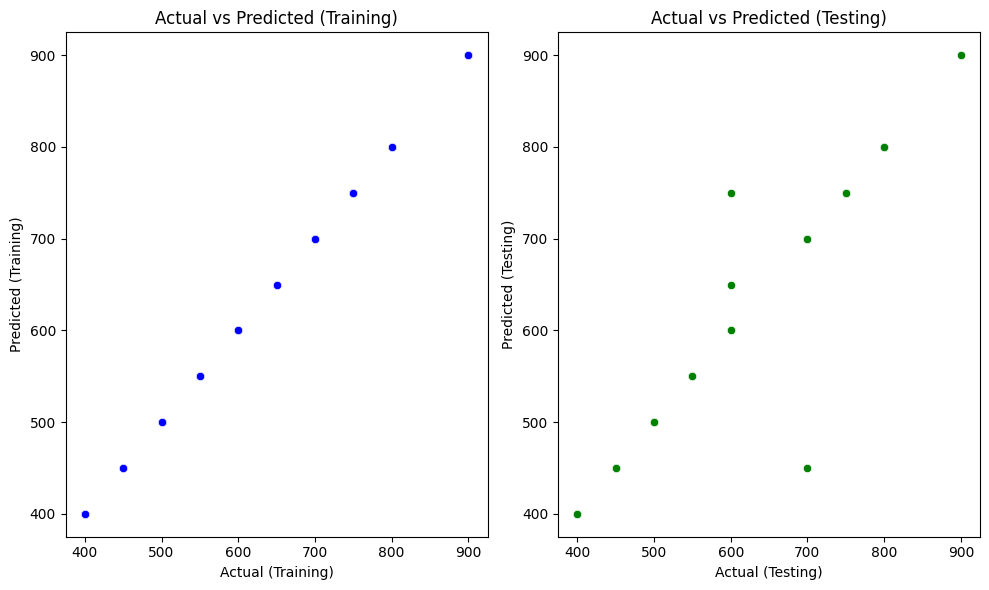

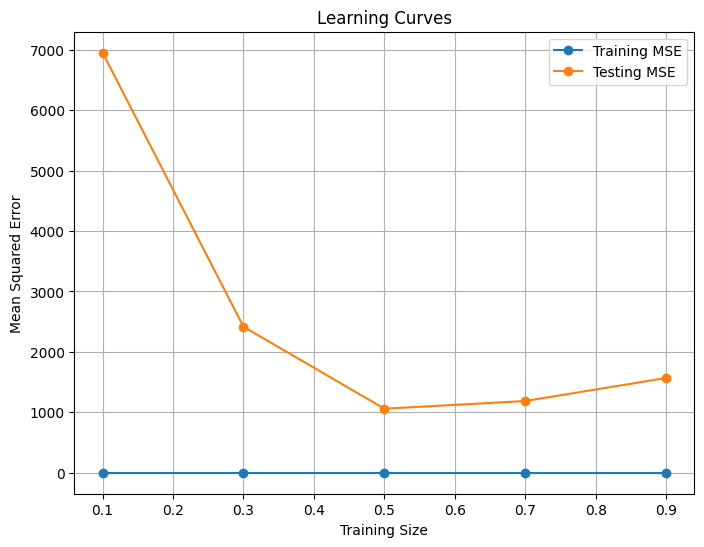

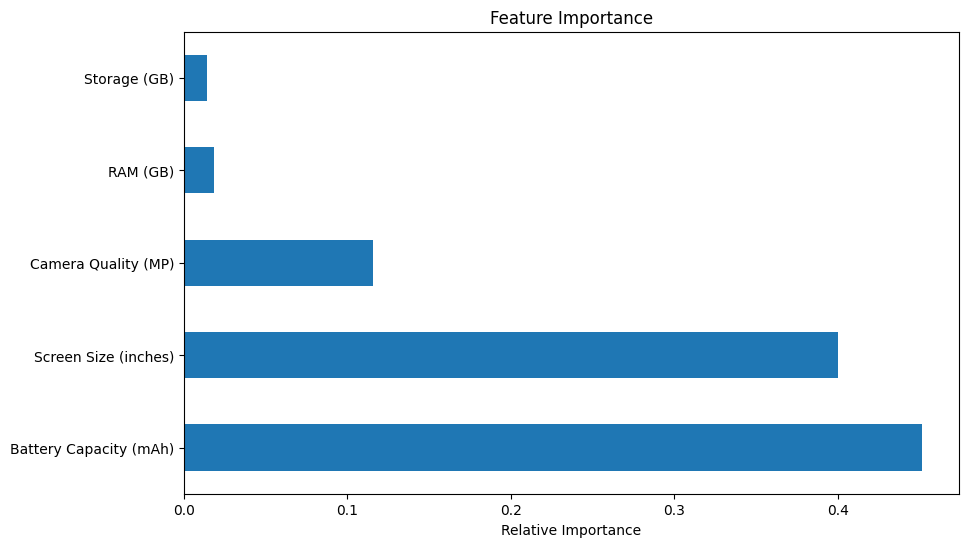


Best MSE on Testing Set: 1059.322033898305
Best R-squared on Testing Set: 0.9395590886739879


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
import graphviz

# Load the dataset
df = pd.read_csv('Mobile Price Prediction.csv')

# Split the dataset into features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Train the model
dt_reg.fit(X_train, y_train)

# Predict on the training set
y_train_pred = dt_reg.predict(X_train)

# Predict on the test set
y_test_pred = dt_reg.predict(X_test)

# Evaluation Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)

print("\nTesting Set:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color='blue')
plt.xlabel('Actual (Training)')
plt.ylabel('Predicted (Training)')
plt.title('Actual vs Predicted (Training)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, color='green')
plt.xlabel('Actual (Testing)')
plt.ylabel('Predicted (Testing)')
plt.title('Actual vs Predicted (Testing)')
plt.tight_layout()
plt.show()

# Learning curves
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
train_mse = []
test_mse = []
best_r2 = -float('inf')  # Initialize with negative infinity

for size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    dt_reg.fit(X_train_partial, y_train_partial)
    y_train_partial_pred = dt_reg.predict(X_train_partial)
    y_test_pred = dt_reg.predict(X_test)
    train_mse.append(mean_squared_error(y_train_partial, y_train_partial_pred))
    mse = mean_squared_error(y_test, y_test_pred)
    test_mse.append(mse)
    r2 = r2_score(y_test, y_test_pred)
    if r2 > best_r2:
        best_r2 = r2  # Update the best R-squared value

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mse, label='Training MSE', marker='o')
plt.plot(train_sizes, test_mse, label='Testing MSE', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance plot
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(dt_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.show()

# Export the Decision Tree as a PNG file
export_graphviz(dt_reg, out_file='tree.dot', feature_names=X.columns, filled=True, rounded=True)

# Convert the DOT file to PNG
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render('decision_tree', format='png', cleanup=True)

best_mse = min(test_mse)
print("\nBest MSE on Testing Set:", best_mse)
print("Best R-squared on Testing Set:", best_r2)

Feature Engineering

Training Set:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared: 1.0

Testing Set:
Mean Squared Error: 1059.322033898305
Mean Absolute Error: 7.627118644067797
R-squared: 0.9395590886739879


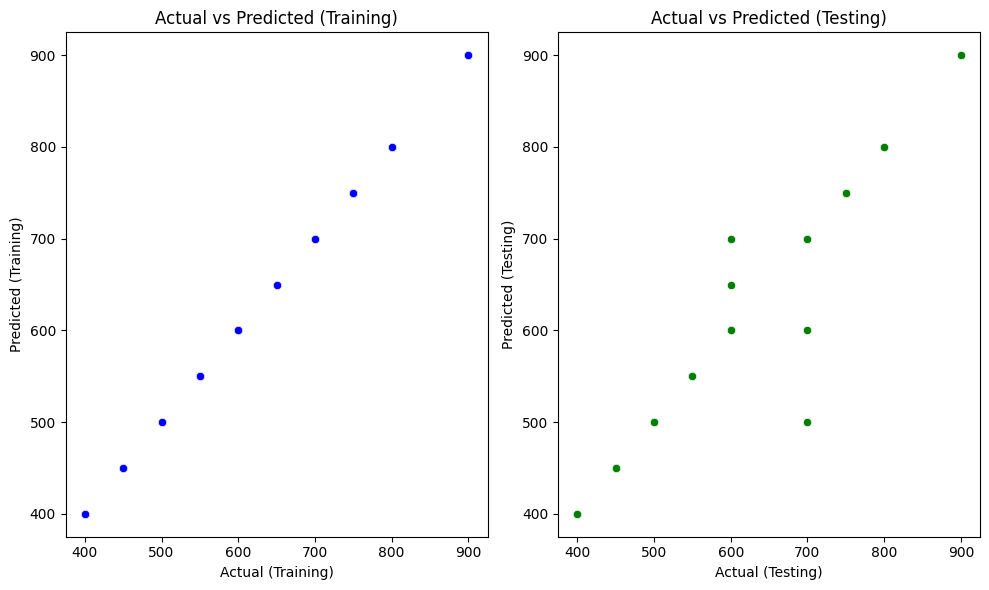

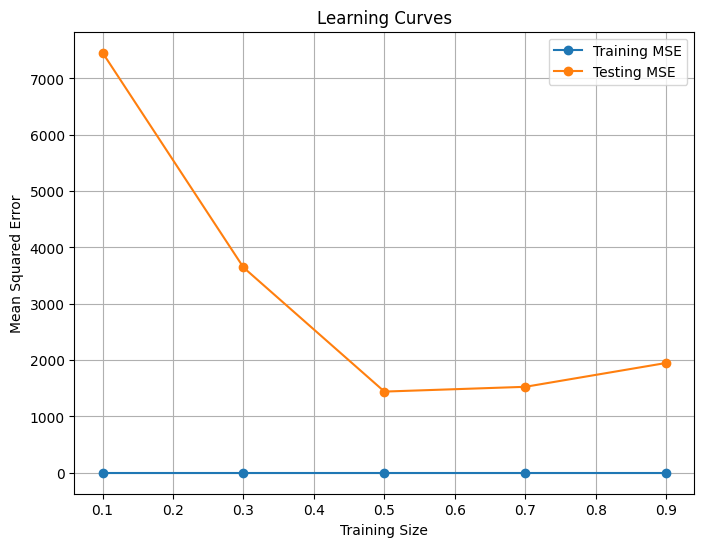

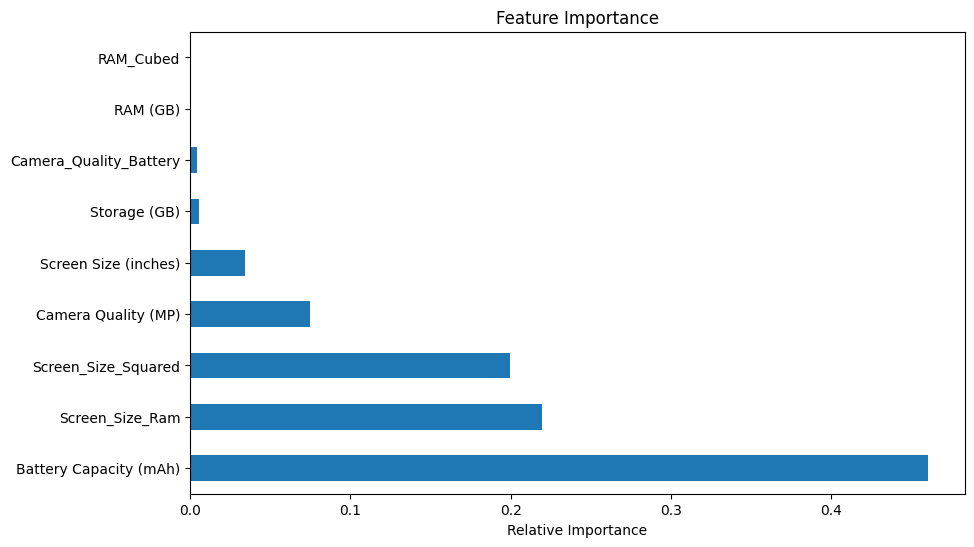


Best MSE on Testing Set: 1440.677966101695
Best R-squared on Testing Set: 0.9178003605966235


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
import graphviz
import os

# Load the dataset
data = pd.read_csv('Mobile Price Prediction.csv')

# Feature Engineering
data['Screen_Size_Ram'] = data['Screen Size (inches)'] * data['RAM (GB)']
data['Camera_Quality_Battery'] = data['Camera Quality (MP)'] * data['Battery Capacity (mAh)']
data['Screen_Size_Squared'] = data['Screen Size (inches)'] ** 2
data['RAM_Cubed'] = data['RAM (GB)'] ** 3

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=['Price ($)'])  # Features
y = data['Price ($)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Train the model
dt_reg.fit(X_train, y_train)

# Predict on the training set
y_train_pred = dt_reg.predict(X_train)

# Predict on the test set
y_test_pred = dt_reg.predict(X_test)

# Evaluation Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)

print("\nTesting Set:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color='blue')
plt.xlabel('Actual (Training)')
plt.ylabel('Predicted (Training)')
plt.title('Actual vs Predicted (Training)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, color='green')
plt.xlabel('Actual (Testing)')
plt.ylabel('Predicted (Testing)')
plt.title('Actual vs Predicted (Testing)')
plt.tight_layout()
plt.show()

# Learning curves
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]
train_mse = []
test_mse = []
best_r2 = -float('inf')  # Initialize with negative infinity

for size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    dt_reg.fit(X_train_partial, y_train_partial)
    y_train_partial_pred = dt_reg.predict(X_train_partial)
    y_test_pred = dt_reg.predict(X_test)
    train_mse.append(mean_squared_error(y_train_partial, y_train_partial_pred))
    mse = mean_squared_error(y_test, y_test_pred)
    test_mse.append(mse)
    r2 = r2_score(y_test, y_test_pred)
    if r2 > best_r2:
        best_r2 = r2  # Update the best R-squared value

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mse, label='Training MSE', marker='o')
plt.plot(train_sizes, test_mse, label='Testing MSE', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance plot
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(dt_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.show()

# Export the Decision Tree as a PNG file
export_graphviz(dt_reg, out_file='tree.dot', feature_names=X.columns, filled=True, rounded=True)

# Convert the DOT file to PNG
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).render('decision_tree', format='png', cleanup=True)
os.remove('tree.dot')

best_mse = min(test_mse)
print("\nBest MSE on Testing Set:", best_mse)
print("Best R-squared on Testing Set:", best_r2)

# Random Forest

Training Results:
Mean Squared Error (MSE): 120.17703862660944
Mean Absolute Error (MAE): 3.98068669527897
R^2 Score: 0.993009363381157

Testing Results:
Mean Squared Error (MSE): 1030.1101694915253
Mean Absolute Error (MAE): 8.830508474576272
R^2 Score: 0.9412258072447139


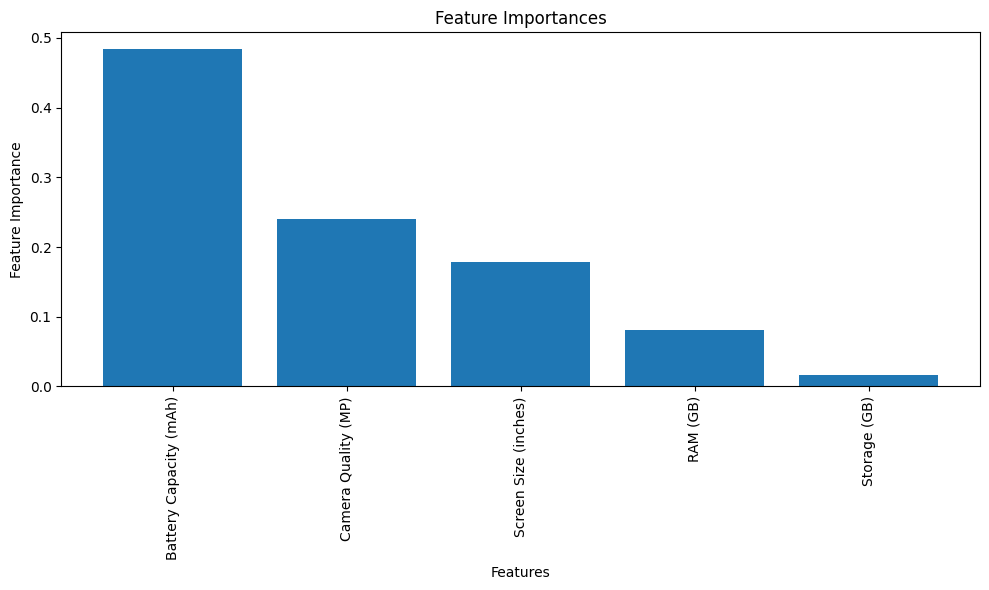

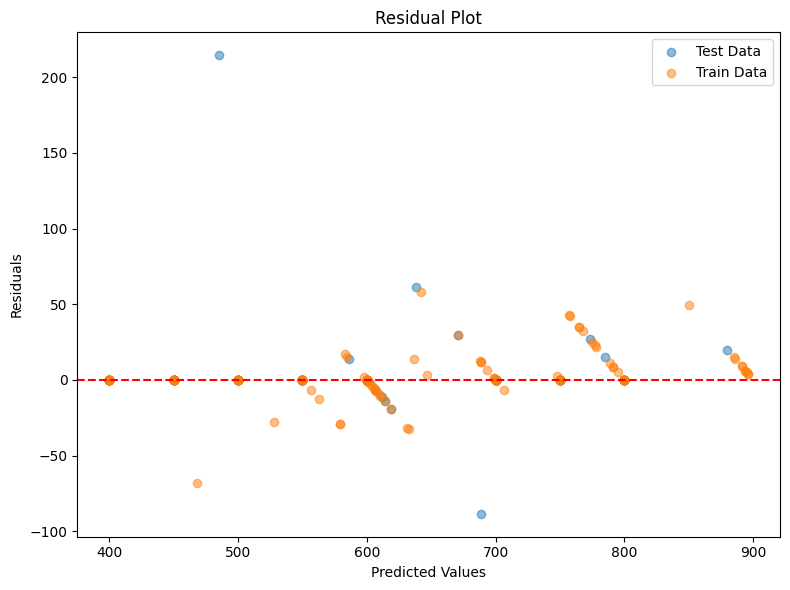

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
from subprocess import call
import os

# Load the dataset
data = pd.read_csv('Mobile Price Prediction.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Extract features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the training set
y_train_pred = rf_regressor.predict(X_train)

# Predict on the test set
y_test_pred = rf_regressor.predict(X_test)

# Evaluation metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Results:")
print("Mean Squared Error (MSE):", train_mse)
print("Mean Absolute Error (MAE):", train_mae)
print("R^2 Score:", train_r2)

# Evaluation metrics for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTesting Results:")
print("Mean Squared Error (MSE):", test_mse)
print("Mean Absolute Error (MAE):", test_mae)
print("R^2 Score:", test_r2)

# Feature importances
feature_importances = rf_regressor.feature_importances_
feature_names = data.columns[:-1]
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, y_test - y_test_pred, alpha=0.5, label='Test Data')
plt.scatter(y_train_pred, y_train - y_train_pred, alpha=0.5, label='Train Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# Create a directory to save the tree images
os.makedirs("tree_images", exist_ok=True)

# Export 5 trees from the Random Forest
for i in range(5):
    estimator = rf_regressor.estimators_[i]  # Get the i-th tree from the forest
    export_graphviz(estimator, out_file=f'tree_images/tree_{i}.dot', feature_names=data.columns[:-1], rounded=True, filled=True)

# Convert DOT files to PNG images
for i in range(5):
    call(['dot', '-Tpng', f'tree_images/tree_{i}.dot', '-o', f'tree_images/tree_{i}.png'])
    os.remove(f'tree_images/tree_{i}.dot')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Mean Squared Error (MSE): 1091.1694915254238
Best Model Mean Absolute Error (MAE): 9.40677966101695
Best Model R^2 Score: 0.9377419931158827


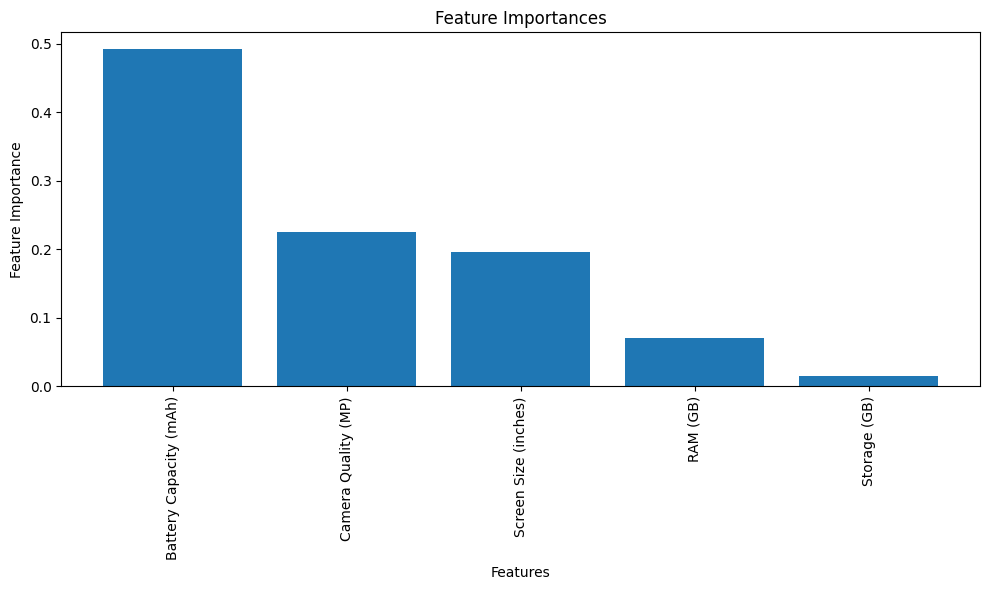

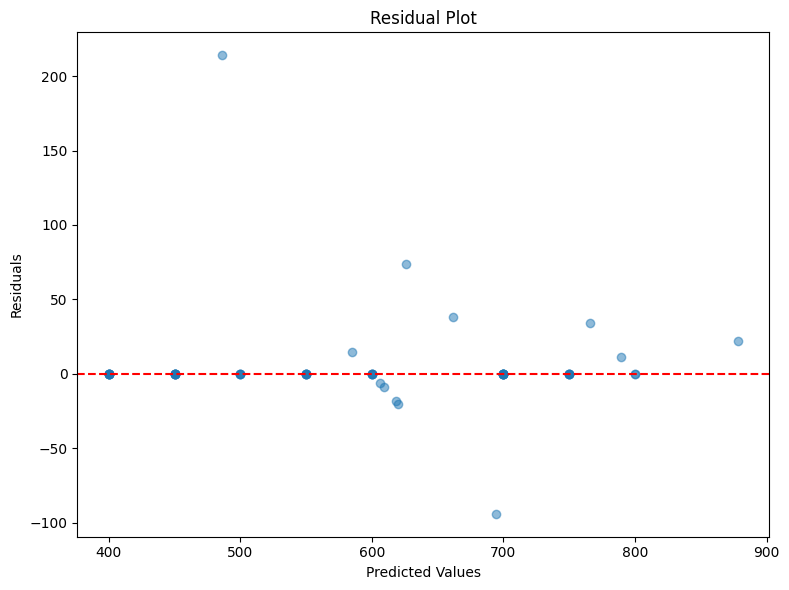

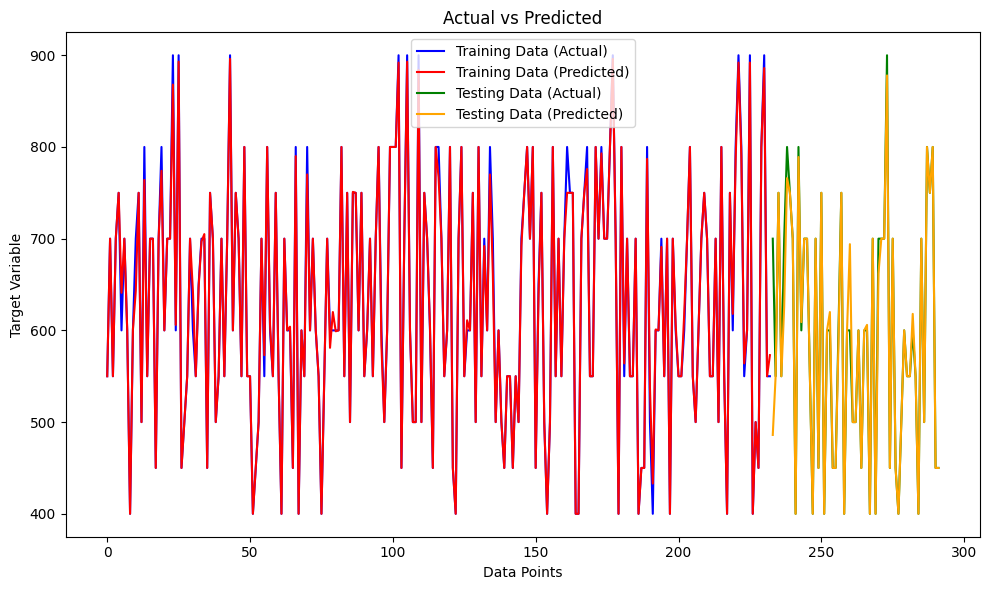

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
from subprocess import call
import os

# Load the dataset
data = pd.read_csv('Mobile Price Prediction.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Extract features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best model
best_rf_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluation metrics
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Model Mean Squared Error (MSE):", mse_best)
print("Best Model Mean Absolute Error (MAE):", mae_best)
print("Best Model R^2 Score:", r2_best)

# Feature importances
feature_importances = best_rf_model.feature_importances_
feature_names = data.columns[:-1]
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_best, y_test - y_pred_best, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Predict on the training set
y_train_pred = best_rf_model.predict(X_train)

# Plotting training data
plt.plot(np.arange(len(y_train)), y_train, color='blue', label='Training Data (Actual)')
plt.plot(np.arange(len(y_train)), y_train_pred, color='red', label='Training Data (Predicted)')

# Predict on the testing set
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, color='green', label='Testing Data (Actual)')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_best, color='orange', label='Testing Data (Predicted)')

plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()

# Create a directory to save the tree images
os.makedirs("tree_images", exist_ok=True)

# Export 5 trees from the best Random Forest
for i in range(5):
    estimator = best_rf_model.estimators_[i]  # Get the i-th tree from the forest
    export_graphviz(estimator, out_file=f'tree_images/tree_{i}.dot', feature_names=data.columns[:-1], rounded=True, filled=True)

# Convert DOT files to PNG images
for i in range(5):
    call(['dot', '-Tpng', f'tree_images/tree_{i}.dot', '-o', f'tree_images/tree_{i}.png'])

Feature Engineering

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Mean Squared Error (MSE): 739.1355932203389
Best Model Mean Absolute Error (MAE): 9.033898305084746
Best Model R^2 Score: 0.957827716767743


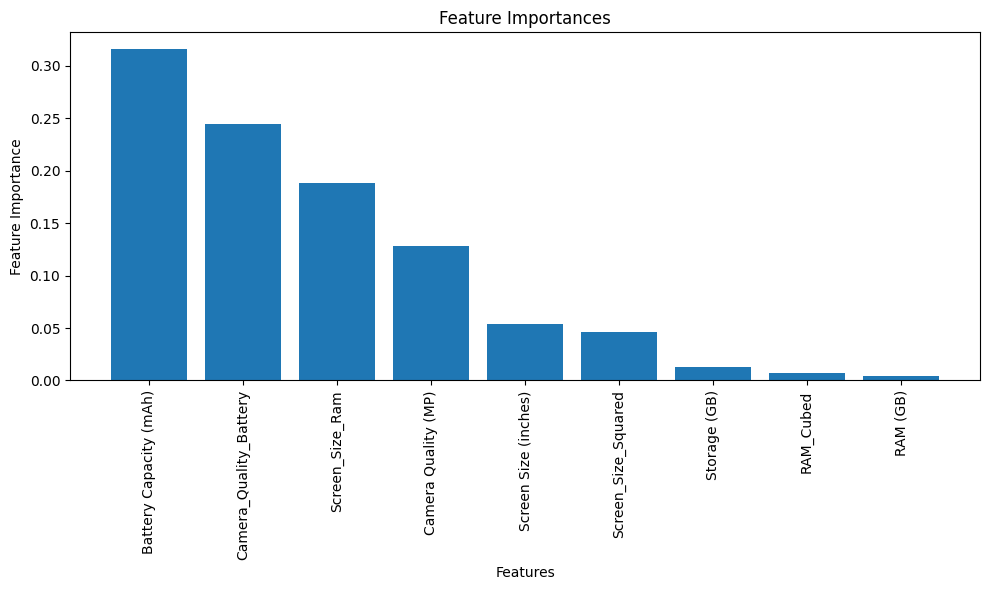

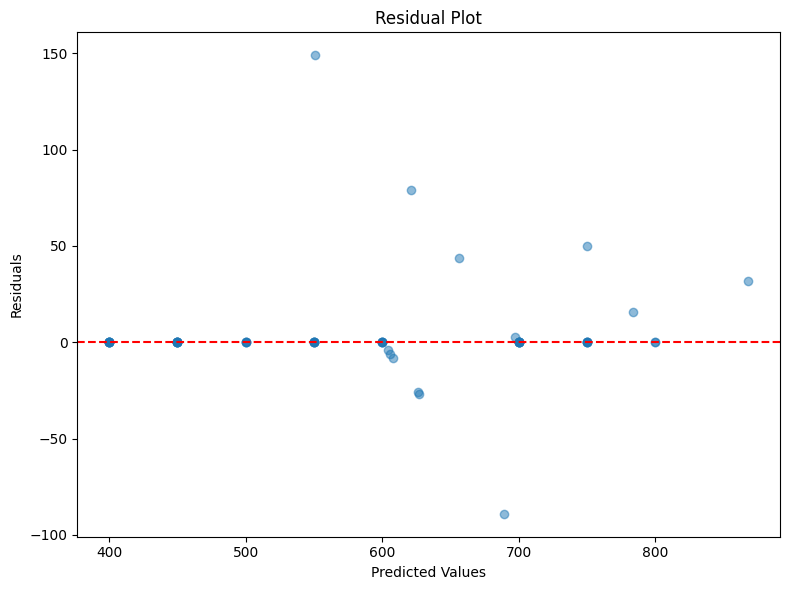

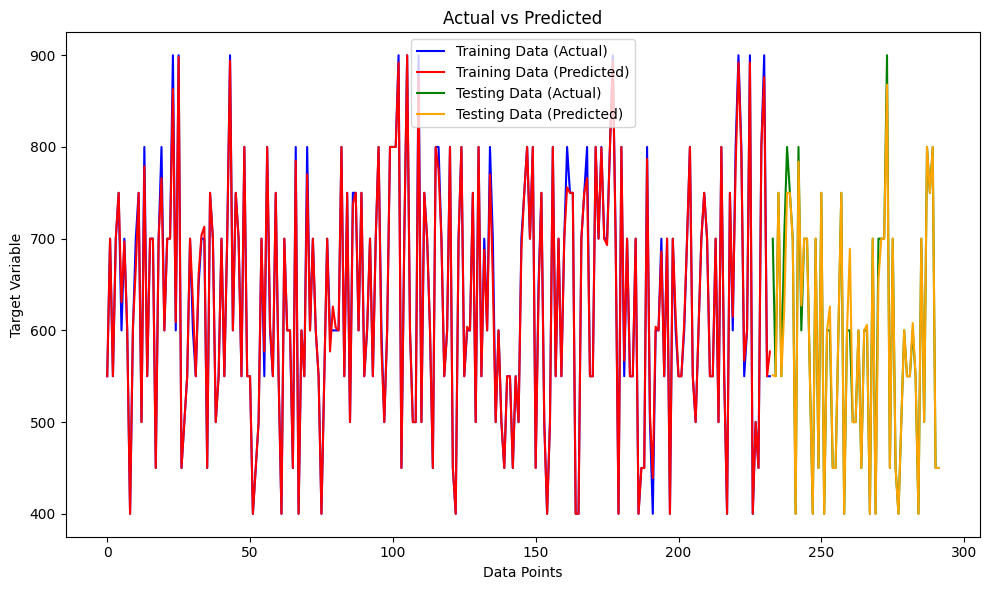

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import export_graphviz
from subprocess import call
import os

# Load the dataset
data = pd.read_csv('Mobile Price Prediction.csv')  # Replace 'your_dataset.csv' with the path to your dataset

# Feature Engineering
data['Screen_Size_Ram'] = data['Screen Size (inches)'] * data['RAM (GB)']
data['Camera_Quality_Battery'] = data['Camera Quality (MP)'] * data['Battery Capacity (mAh)']
data['Screen_Size_Squared'] = data['Screen Size (inches)'] ** 2
data['RAM_Cubed'] = data['RAM (GB)'] ** 3

# Extract features (X) and target variable (y)
X = data.drop(columns=['Price ($)']).values
y = data['Price ($)'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best model
best_rf_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluation metrics
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best Model Mean Squared Error (MSE):", mse_best)
print("Best Model Mean Absolute Error (MAE):", mae_best)
print("Best Model R^2 Score:", r2_best)

# Feature importances
feature_importances = best_rf_model.feature_importances_
feature_names = data.drop(columns=['Price ($)']).columns
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_best, y_test - y_pred_best, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))

# Predict on the training set
y_train_pred = best_rf_model.predict(X_train)

# Plotting training data
plt.plot(np.arange(len(y_train)), y_train, color='blue', label='Training Data (Actual)')
plt.plot(np.arange(len(y_train)), y_train_pred, color='red', label='Training Data (Predicted)')

# Predict on the testing set
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, color='green', label='Testing Data (Actual)')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_best, color='orange', label='Testing Data (Predicted)')

plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()

# Create a directory to save the tree images
os.makedirs("tree_images", exist_ok=True)

# Export 5 trees from the best Random Forest
for i in range(5):
    estimator = best_rf_model.estimators_[i]  # Get the i-th tree from the forest
    export_graphviz(estimator, out_file=f'tree_images/tree_{i}.dot', feature_names=data.columns[:-1], rounded=True, filled=True)

# Convert DOT files to PNG images
for i in range(5):
    call(['dot', '-Tpng', f'tree_images/tree_{i}.dot', '-o', f'tree_images/tree_{i}.png'])

# Final results

Model and R2 scores


---

Linear regression - 26.7%


---


KNN - 92.04%


---


Decision tree - 93.95%


---




Random forest - 95.7%


---

